# SQL for Data Analysis
<hr>

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL-Advanced-JOINs-&amp;-Performance-Tuning" data-toc-modified-id="SQL-Advanced-JOINs-&amp;-Performance-Tuning-1">SQL Advanced JOINs &amp; Performance Tuning</a></span><ul class="toc-item"><li><span><a href="#FULL-OUTER-JOIN" data-toc-modified-id="FULL-OUTER-JOIN-1.1">FULL OUTER JOIN</a></span></li><li><span><a href="#Finding-Matched-and-Unmatched-Rows-with-FULL-OUTER-JOIN" data-toc-modified-id="Finding-Matched-and-Unmatched-Rows-with-FULL-OUTER-JOIN-1.2">Finding Matched and Unmatched Rows with FULL OUTER JOIN</a></span><ul class="toc-item"><li><span><a href="#Practice-Question" data-toc-modified-id="Practice-Question-1.2.1">Practice Question</a></span></li></ul></li><li><span><a href="#JOINs-with-Comparison-Operators" data-toc-modified-id="JOINs-with-Comparison-Operators-1.3">JOINs with Comparison Operators</a></span></li><li><span><a href="#Self-JOINs" data-toc-modified-id="Self-JOINs-1.4">Self JOINs</a></span></li><li><span><a href="#UNION" data-toc-modified-id="UNION-1.5">UNION</a></span><ul class="toc-item"><li><span><a href="#Appending-Data-via-UNION" data-toc-modified-id="Appending-Data-via-UNION-1.5.1">Appending Data via UNION</a></span></li></ul></li></ul></li><li><span><a href="#Performance-Tuning" data-toc-modified-id="Performance-Tuning-2">Performance Tuning</a></span><ul class="toc-item"><li><span><a href="#Performance-Tuning-(1)" data-toc-modified-id="Performance-Tuning-(1)-2.1">Performance Tuning (1)</a></span></li><li><span><a href="#Performance-Tuning-(2)" data-toc-modified-id="Performance-Tuning-(2)-2.2">Performance Tuning (2)</a></span></li><li><span><a href="#Performance-Tuning-(3)" data-toc-modified-id="Performance-Tuning-(3)-2.3">Performance Tuning (3)</a></span></li></ul></li></ul></div>

## SQL Advanced JOINs & Performance Tuning

### FULL OUTER JOIN

In some cases, you might want to include unmatched rows from both tables being joined. You can do this with a full outer join.

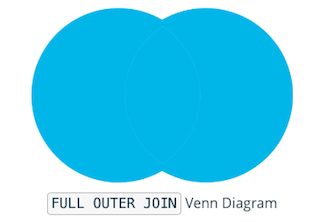

```sql
SELECT column_name(s)
FROM Table_A
FULL OUTER JOIN Table_B 
ON Table_A.column_name = Table_B.column_name;
```

A common application of this is when joining two tables on a timestamp. Let’s say you’ve got one table containing the number of <i>item 1</i> sold each day, and another containing the number of <i>item 2 sold.</i> If a certain date, like January 1, 2018, exists in the left table but not the right, while another date, like January 2, 2018, exists in the right table but not the left:

* a left join would drop the row with January 2, 2018 from the result set
* a right join would drop January 1, 2018 from the result set

The only way to make sure both January 1, 2018 and January 2, 2018 make it into the results is to do a full outer join (can also be written as full join). A full outer join returns unmatched records in each table with null values for the columns that came from the opposite table.
If you wanted to return unmatched rows only, which is useful for some cases of data assessment, you can isolate them by adding the following line to the end of the query:

```sql
WHERE Table_A.column_name IS NULL OR Table_B.column_name IS NULL
```

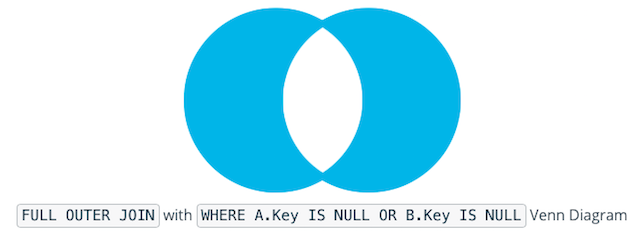

### Finding Matched and Unmatched Rows with FULL OUTER JOIN

`LEFT JOIN` and `RIGHT JOIN` each return unmatched rows from one of the tables— `FULL JOIN` returns unmatched rows from both tables. 

#### Practice Question 
You want to see:
* each account who has a sales rep and each sales rep that has an account (all of the columns in these returned rows will be full)
* but also each account that does not have a sales rep and each sales rep that does not have an account (some of the columns in these returned rows will be empty)  

Write a query with `FULL OUTER JOIN` to fit the above described scenario (selecting all of the columns in both of the relevant tables, `accounts` and `sales_reps`) 
```sql
SELECT *
FROM accounts
FULL JOIN sales_reps ON accounts.sales_rep_id = sales_reps.id
```
**Note:** If unmatched rows existed (they don't for this query), you could isolate them by adding the following line to the end of the query:
```sql
WHERE accounts.sales_rep_id IS NULL OR sales_reps.id IS NULL
```

### JOINs with Comparison Operators

**Example:**

Write a query that left joins the `accounts` table and the `sales_reps` tables on each sale rep's ID number and joins it using the `<` comparison operator on `accounts.primary_poc` and `sales_reps.name`, like so:

`accounts.primary_poc < sales_reps.name`

The query results should be a table with three columns: the account name (e.g. Johnson Controls), the primary contact name (e.g. Cammy Sosnowski), and the sales representative's name (e.g. Samuel Racine). Then answer the subsequent multiple choice question.
```sql
SELECT a.name AS account, a.primary_poc, s.name AS sales_rep
FROM accounts a
LEFT JOIN sales_reps s
ON s.id = a.sales_rep_id AND a.primary_poc < s.name;
```
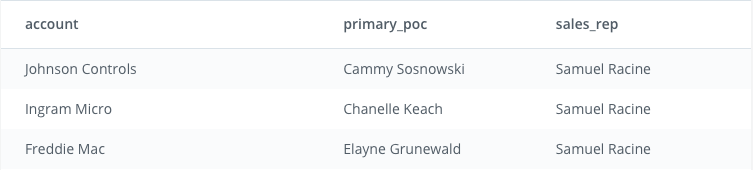

What is the relationship between accounts.primary_poc and sales_reps.name?
* The primary point of contact's full name comes before the sale's representative name alphabetically.

### Self JOINs

**Example:**

If you wanted to know which accounts made multiple orders within 30 days, one way to do this, would be to join the orders table onto itself with an inequality join.
```sql
SELECT o1.id AS o1_id,
       o1.account_id AS o1_account_id,
       o1.occurred_at AS o1_occurred_at,
       o2.id AS o2_id,
       o2.account_id AS o2_account_id,
       o2.occurred_at AS o2_occurred_at
  FROM orders o1
 LEFT JOIN orders o2
   ON o1.account_id = o2.account_id
  AND o2.occurred_at > o1.occurred_at
  AND o2.occurred_at <= o1.occurred_at + INTERVAL '28 days'
ORDER BY o1.account_id, o1.occurred_at
```
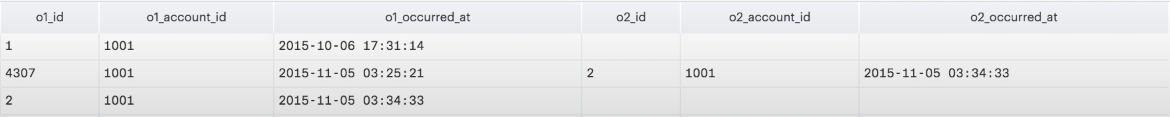

**Note:**

Since we want the records in o2 to be within 28 days after the records in o1, we set up two conditional statements in the JOIN clause, both with inequalities:<br>  
`o2.occurred_at > o1.occurred_at` to find orders that happened after the original order was placed.<br>   
`o2.occurred_at <= o1.occurred_at + INTERVAL '28 days'` to time bound the records to 28 days.

<i>You can find more on the types of INTERVALS (and other date related functionality) in the Postgres documentation [here](https://www.postgresql.org/docs/current/functions-datetime.html).</i>

### UNION

> The UNION operator is used to combine the result sets of 2 or more SELECT statements.
> * UNION removes duplicate rows.
> * UNION ALL does not remove duplicate rows.

**Resources**

The resource [here](https://www.techonthenet.com/sql/union.php) on SQL UNIONs is helpful in understanding syntax and examples.

#### Appending Data via UNION

SQL's two strict rules for appending data:

1. Both tables must have the same number of columns.

2. Those columns must have the same data types in the same order as the first table.

A common misconception is that column names have to be the same. Column names, in fact, don't need to be the same to append two tables but you will find that they typically are.


**Example:**

```sql
SELECT *
FROM web_events

UNION ALL

SELECT *
FROM web_events_2
```
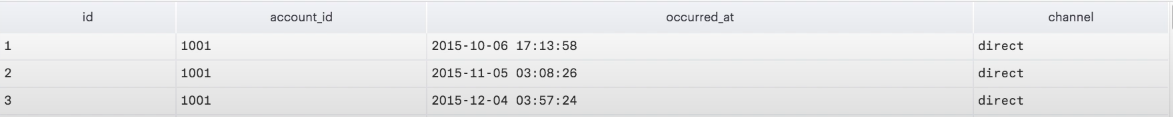

Once you union two select statements together, you can perform operations on the entire combined data set rather than just on the individual parts. You can do this by unioning them together in a common table expression so the combined results are treated as a single result set.
```sql
WITH web_events AS (
    SELECT *
    FROM web_events

      UNION ALL

    SELECT *
    FROM web_events_2)
    
SELECT channel,
  COUNT(*) AS sessions
FROM web_events
GROUP BY 1
ORDER BY 2 DESC;
```
Here, we've taken the combined results from these two tables, and use them to count up all of the sessions by channel.

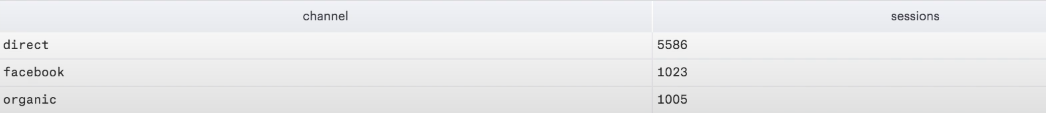

## Performance Tuning

One way to make a query run faster is to reduce the number of calculations that need to be performed. Some of the high-level things that will affect the number of calculations a given query will make include:

* Table size
* Joins
* Aggregations

Query runtime is also dependent on some things that you can’t really control related to the database itself:

* Other users running queries concurrently on the database
* Database software and optimization (e.g., Postgres is optimized differently than Redshift)

### Performance Tuning (1) 

* If you have time series data, limiting to a small time window can make your queries run more quickly.<br><br>  
* Testing your queries on a subset of data, finalizing your query, then removing the subset limitation is a sound strategy.<br><br>
* When working with subqueries, limiting the amount of data you're working with in the place where it will be executed first will have the maximum impact on query run time. For example, by limiting the number of rows to be aggregated in the subquery:
```sql
SELECT account_id,
  SUM(poster_qty) AS sum_poster_qty
FROM (
    SELECT *
    FROM orders
    LIMIT 100) sub
WHERE occurred_at >= '2016-01-01'
  AND occurred_at < '2016-07-01'
GROUP BY 1;
```



### Performance Tuning (2)

* Reduce table sizes before joining them. 

In the following example, the web events table is pre-aggregated, to reduce the number of rows that need to be evaluated in the join.

```sql
SELECT a.name,
  sub.web_events
FROM (
    SELECT account_id,
      COUNT(*) AS web_events
    FROM web_events
    GROUP BY 1) sub
JOIN accounts a
ON a.id = sub.account_id
ORDER BY 2 DESC;
```

### Performance Tuning (3)

* Add explain at the beginning of any working query to get a sense of how long it will take. The output, known as a query plan, shows the order in which the query will be executed.
```sql
EXPLAIN
SELECT *
FROM web_events
WHERE occurred_at >= '2016-01-01'
  AND occurred_at < '2016-02-01'
LIMIT 100
```
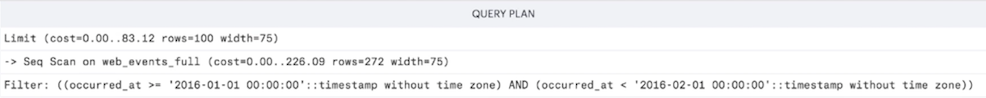

**Note:**

<i>In the above query plan, first the filter is applied. Then, the database reads the remaining rows and limits them, if applicable, to 100 rows. The measure of cost is listed next to the number of rows. A longer run time means higher cost.<br><br>This is most useful if you run explain on a query, modify the steps that are expensive, then run explain again to see if the cost is reduced. </i>

<div align='center'><b>End of Course</b></div>